<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/leaf-classification/blob/main/Mod_8_Leaf_Classification_Part_2_NN_DoE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Part 1 Code (Data Prep) - https://colab.research.google.com/drive/1dN0y6HYqIjKFhq7pgYYhlCY2ecmYSoN6?usp=sharing

Part 2 Code (NN DoE) - https://colab.research.google.com/drive/1xpimK1T2i8VQ9clx9Jx69ZKy6m0844Vu?usp=sharing

Part 3 Code (CNN Models) - https://colab.research.google.com/drive/1XCXj9PZTnriaDO9sqpb-PucG1fMslN4B?usp=sharing

Data taken from - https://www.kaggle.com/competitions/leaf-classification/data

### Ready data files

#### Import modules and load data

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
import time

from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [ ]:
df_train.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,1,-0.486611,-0.131357,-0.330956,-0.682244,-0.138444,-0.554066,0.465218,-0.395064,-0.584019,0.906636,-0.404139,0.644338,0.543066,-0.607031,0.959250,-0.105088,1.490593,-0.394286,-0.852978,1.267718,0.221417,-0.415944,-0.231747,0.620501,-0.696191,1.018261,-0.518691,-0.132137,0.045354,-0.052917,0.052932,-0.300014,0.368271,-0.518925,-0.848826,-0.384227,-0.566484,0.428035,1.682149,1.115620,-0.464473,-0.534374,0.125474,0.252183,-0.694348,0.280566,0.094409,1.178820,-0.535978,0.204314,0.224846,-0.361672,1.149322,-0.140966,0.329836,-0.232585,0.113025,-

In [ ]:
df_test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.107387,-0.483408,1.785924,-0.407108,-0.563515,-0.441400,-0.762355,-0.395064,-0.146528,0.298726,-0.703804,0.810884,0.753914,-0.459817,1.369852,-0.105088,-1.218090,0.064711,-0.718025,0.257541,-0.481393,-0.607457,-0.231747,-0.139038,-0.081940,-0.251358,-0.518691,0.145023,0.045354,0.301058,-0.537004,-0.300014,0.368271,-0.518925,0.038243,-0.740336,2.326256,1.435713,1.239460,-0.226178,-0.297788,-1.074540,0.125474,1.088300,-0.774701,-0.629097,-0.087744,1.373389,-0.535978,-0.128537,0.224846,-0.106112,-0.674790,-0.392350,-0.475540,-0.674899,-0.28

#### Group variables

In [ ]:
# Use df_train to define column groups
all_columns = df_train.columns

# Feature groups
margin_vars = [col for col in all_columns if col.startswith("margin")]
shape_vars = [col for col in all_columns if col.startswith("shape")]
texture_vars = [col for col in all_columns if col.startswith("texture")]

# Class labels: one-hot encoded columns for species (exclude id and features)
leaf_classes = [col for col in all_columns if col not in ['id'] + margin_vars + shape_vars + texture_vars]

In [ ]:
print(f"# margin_vars: {len(margin_vars)}")
print(f"# shape_vars: {len(shape_vars)}")
print(f"# texture_vars: {len(texture_vars)}")
print(f"# leaf_classes: {len(leaf_classes)}")

# margin_vars: 64
# shape_vars: 64
# texture_vars: 64
# leaf_classes: 99


### Neural Net DoE

#### Prep data for DoE

In [ ]:
# Set of input features
input_vars = margin_vars + shape_vars + texture_vars

# Create input and output arrays
X = df_train[input_vars].values
y = df_train[leaf_classes].values  # Already one-hot encoded

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y.argmax(axis=1))

# Count check
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (792, 192)
y_train shape: (792, 99)
X_val shape: (198, 192)
y_val shape: (198, 99)


#### DoE grid search


 Training model: 2 layers × 50 nodes/layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


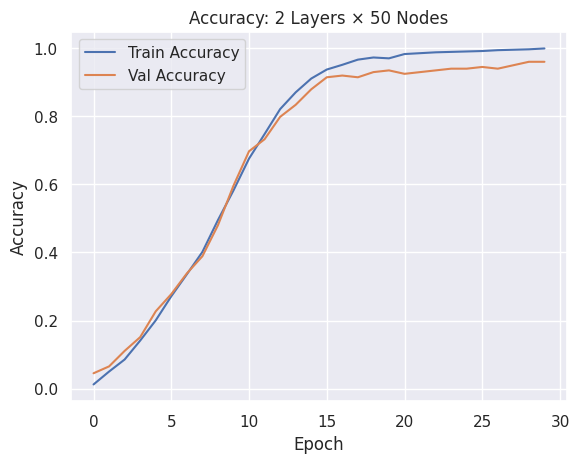

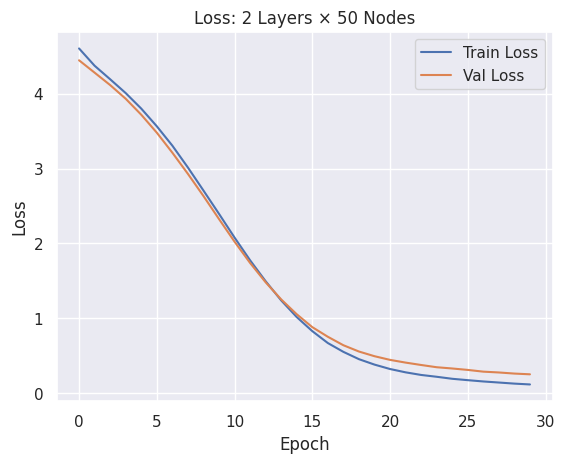


 Training model: 2 layers × 100 nodes/layer


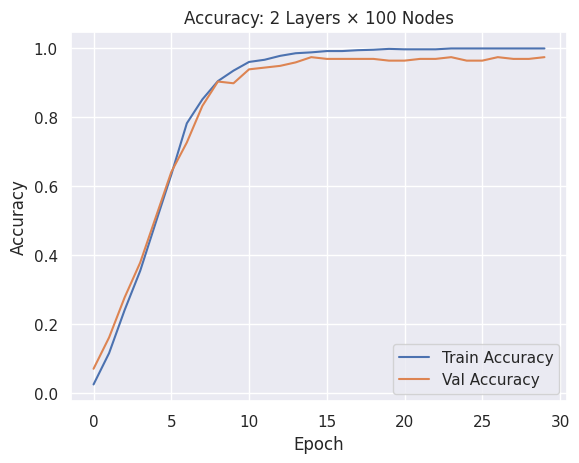

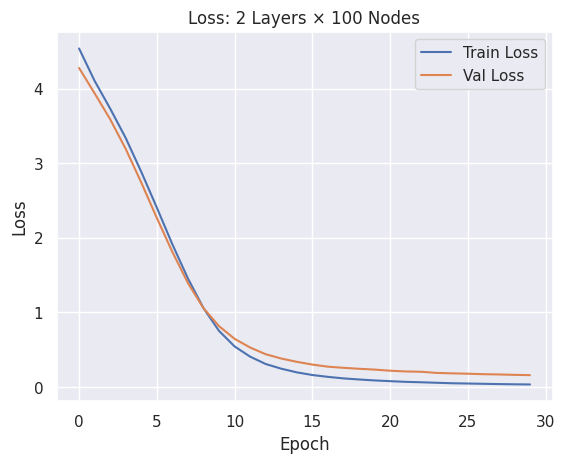


 Training model: 5 layers × 50 nodes/layer


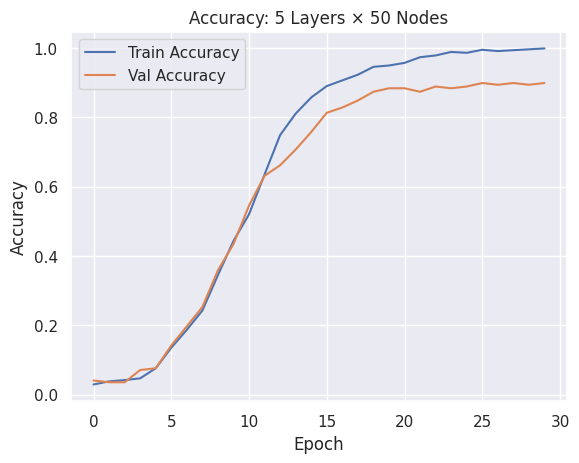

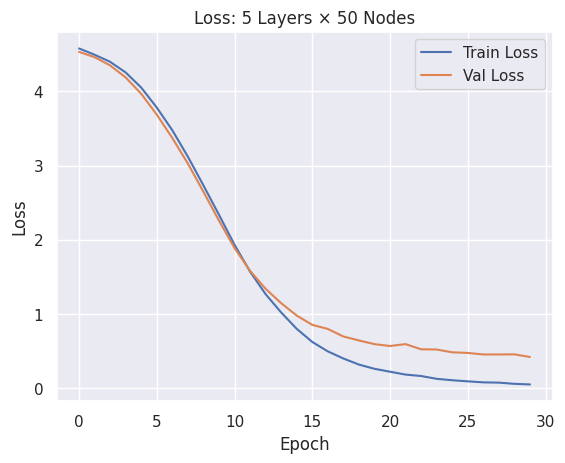


 Training model: 5 layers × 100 nodes/layer


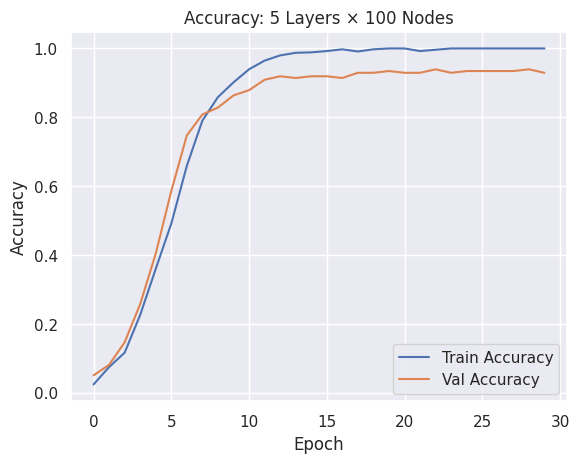

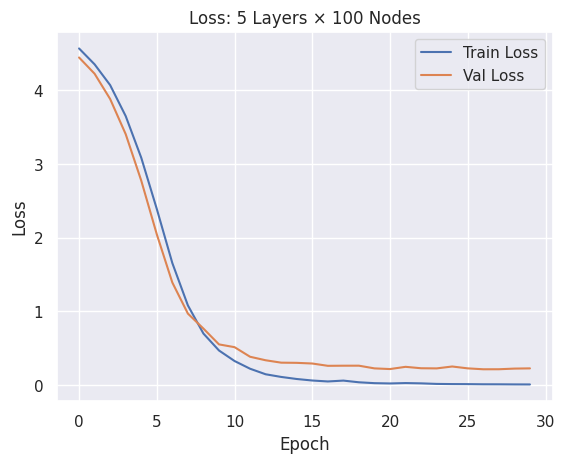

   layers  nodes  train_accuracy  train_loss  val_accuracy  val_loss  \
0       2     50          0.9987      0.1154        0.9596    0.2509   
1       2    100          1.0000      0.0327        0.9747    0.1575   
2       5     50          0.9987      0.0505        0.8990    0.4204   
3       5    100          1.0000      0.0063        0.9293    0.2245   

   training_time_sec  
0               5.62  
1               4.97  
2               6.47  
3               5.87  


In [ ]:
# Design of Experiments grid
layers_list = [2, 5]
nodes_list = [50, 100]

results = []
best_model = None
best_val_accuracy = 0

# Loop through grid
for layers in layers_list:
    for nodes in nodes_list:
        print(f"\n Training model: {layers} layers × {nodes} nodes/layer")

        # Build model
        model = Sequential()
        model.add(Flatten(input_shape=(X_train.shape[1],)))

        for _ in range(layers):
            model.add(Dense(nodes, activation='relu'))

        model.add(Dense(y_train.shape[1], activation='softmax'))

        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

        start_time = time.time()
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=30,
            batch_size=128,
            verbose=0
        )
        end_time = time.time()
        training_time = end_time - start_time

        # Plot accuracy
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'Accuracy: {layers} Layers × {nodes} Nodes')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot loss
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'Loss: {layers} Layers × {nodes} Nodes')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Evaluate model
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        train_accuracy = history.history['accuracy'][-1]
        train_loss = history.history['loss'][-1]

        results.append({
            'layers': layers,
            'nodes': nodes,
            'train_accuracy': round(train_accuracy, 4),
            'train_loss': round(train_loss, 4),
            'val_accuracy': round(val_accuracy, 4),
            'val_loss': round(val_loss, 4),
            'training_time_sec': round(training_time, 2)
        })

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model

# Summary table
df_results = pd.DataFrame(results)
print(df_results)


🔧 Training: 2 layers × 64 nodes/layer × dropout=0.3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


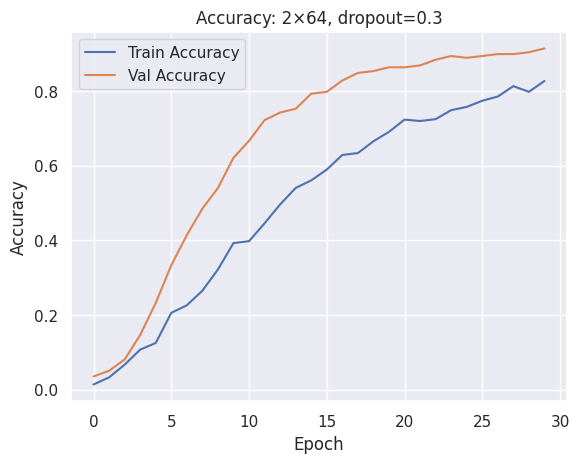

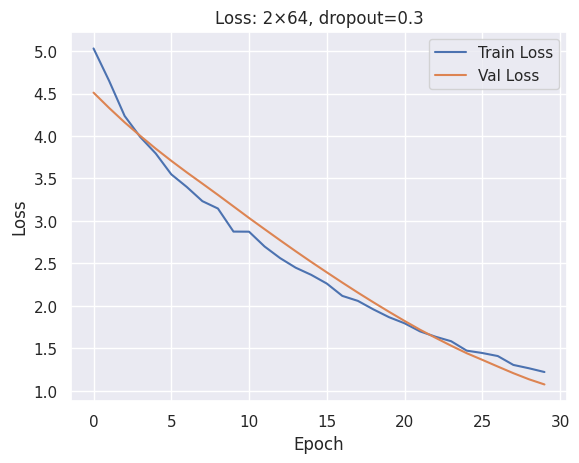


🔧 Training: 2 layers × 64 nodes/layer × dropout=0.5


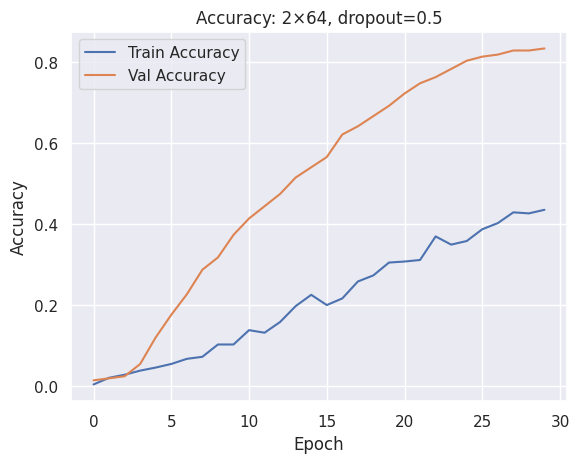

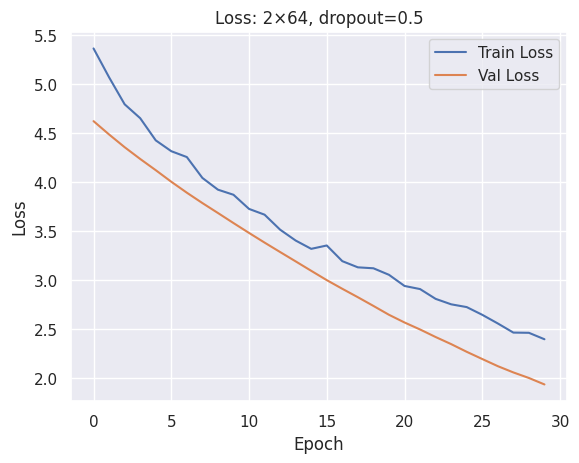


🔧 Training: 2 layers × 100 nodes/layer × dropout=0.3


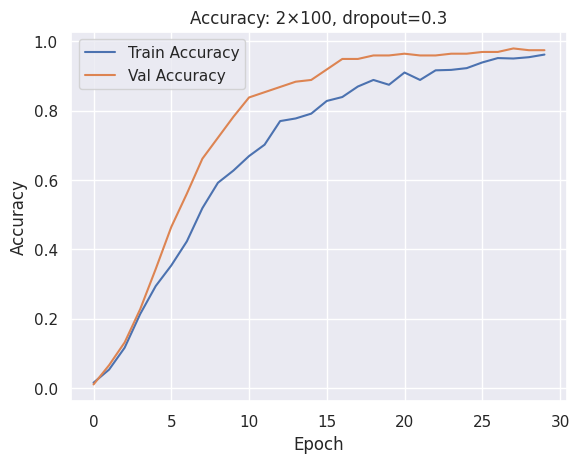

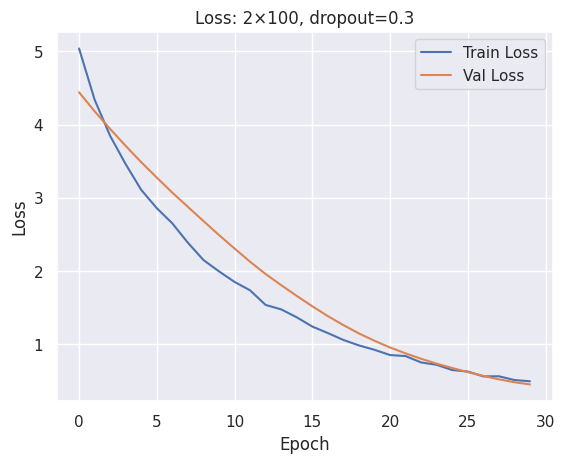


🔧 Training: 2 layers × 100 nodes/layer × dropout=0.5


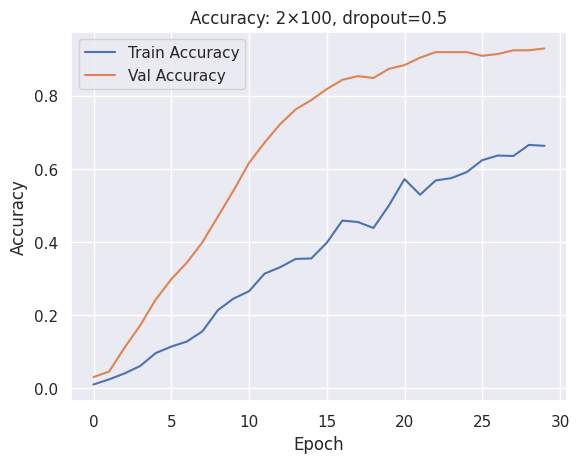

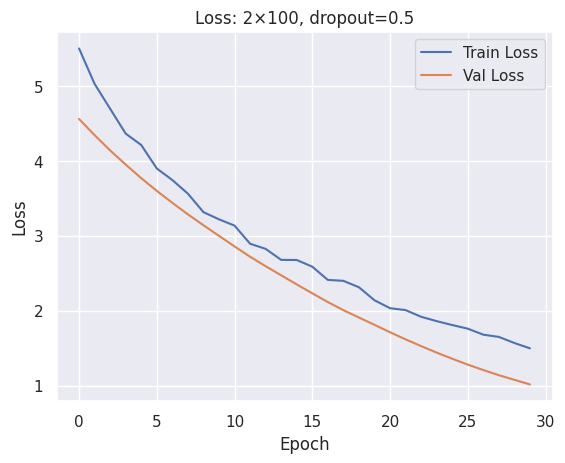


🔧 Training: 2 layers × 128 nodes/layer × dropout=0.3


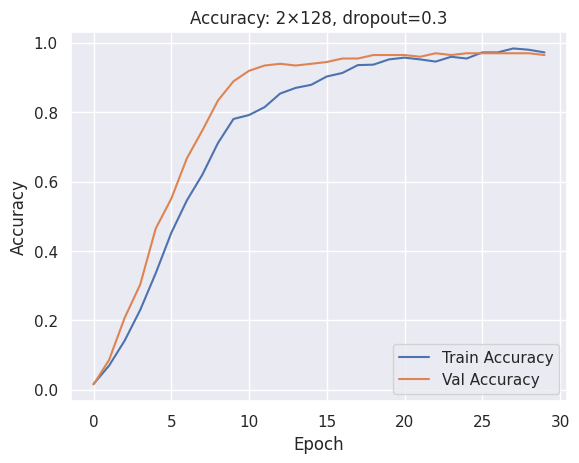

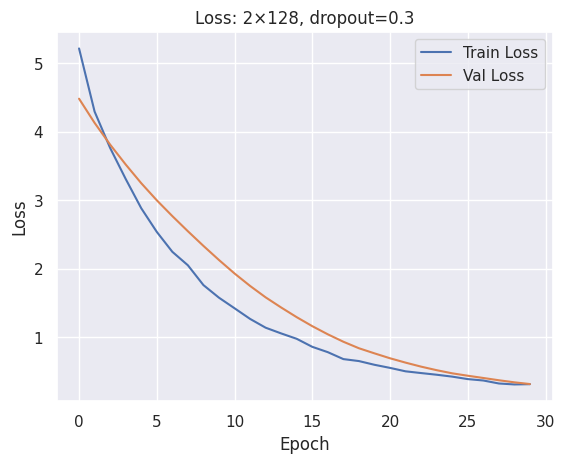


🔧 Training: 2 layers × 128 nodes/layer × dropout=0.5


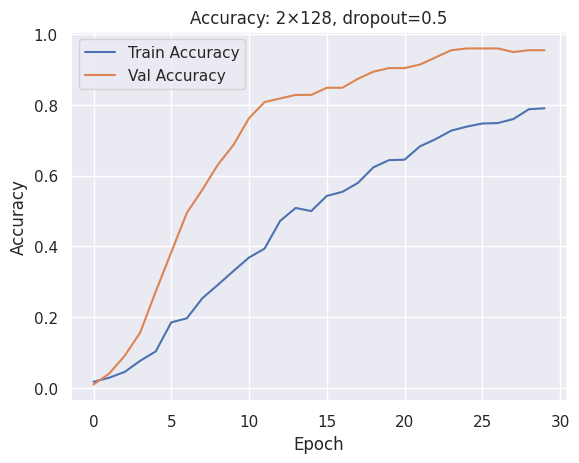

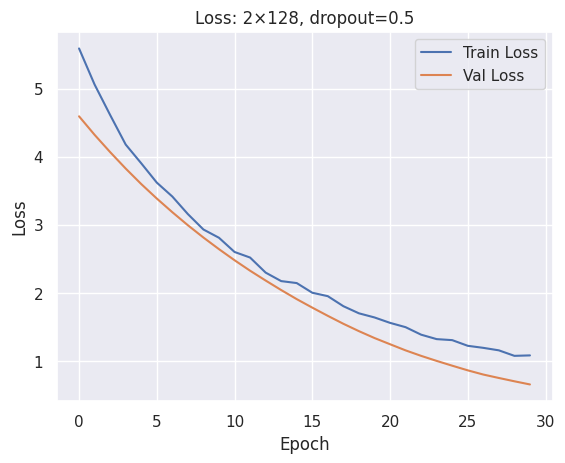


🔧 Training: 3 layers × 64 nodes/layer × dropout=0.3


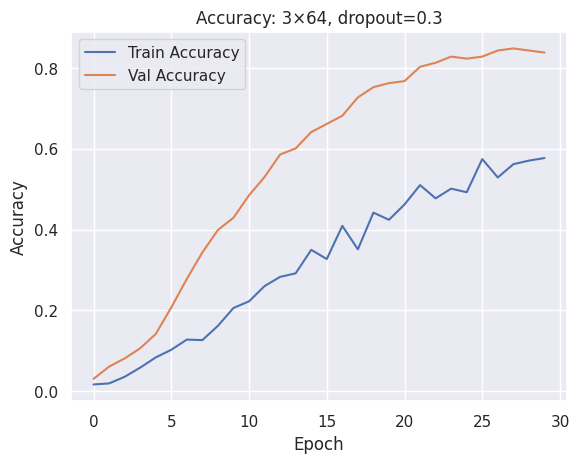

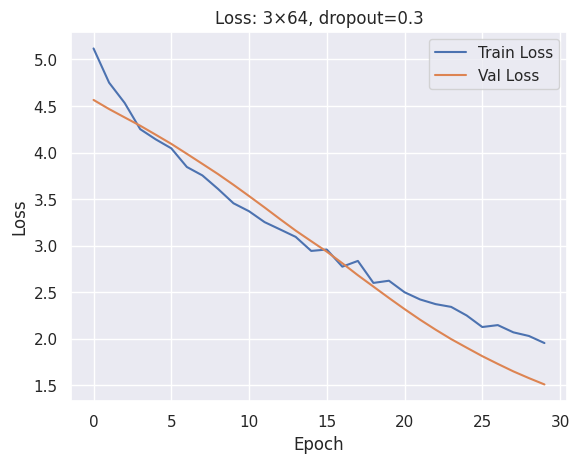


🔧 Training: 3 layers × 64 nodes/layer × dropout=0.5


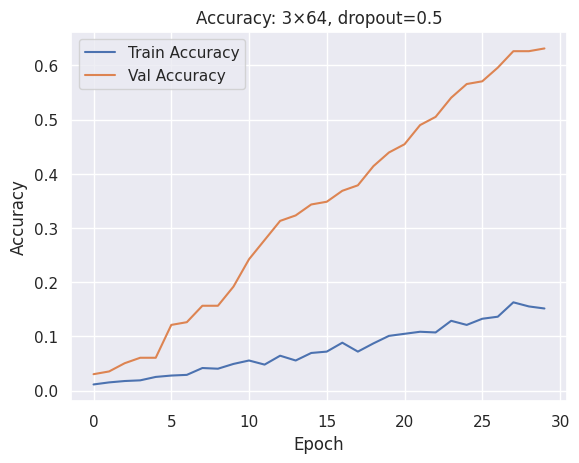

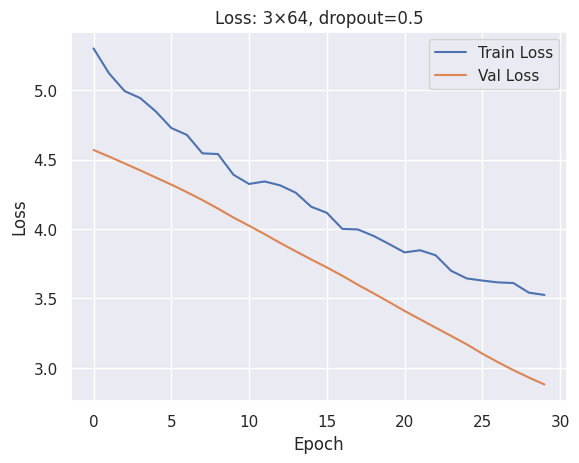


🔧 Training: 3 layers × 100 nodes/layer × dropout=0.3


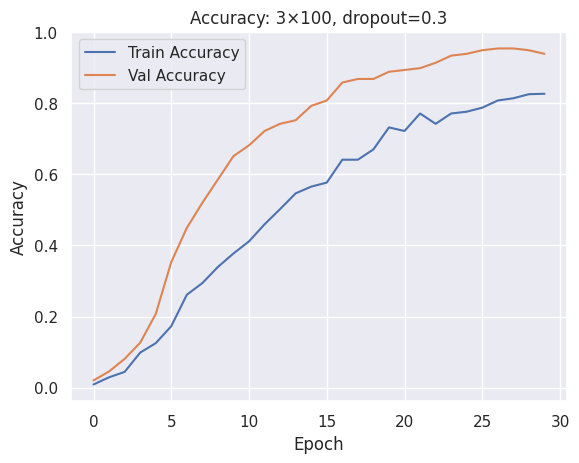

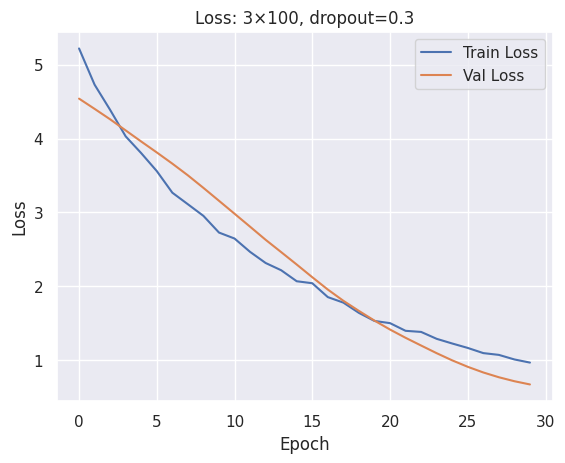


🔧 Training: 3 layers × 100 nodes/layer × dropout=0.5


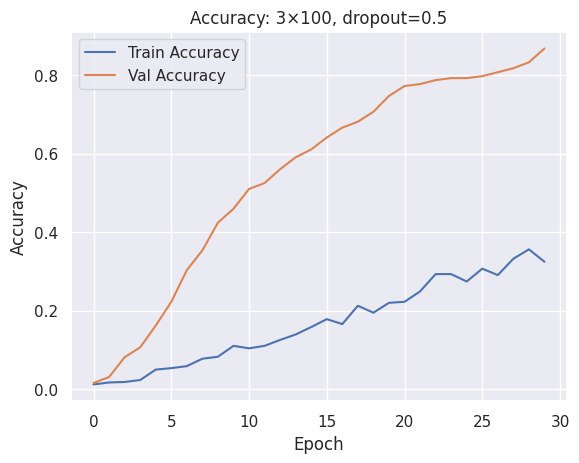

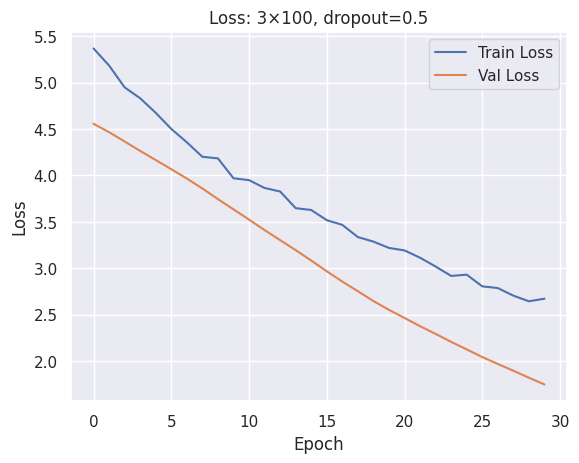


🔧 Training: 3 layers × 128 nodes/layer × dropout=0.3


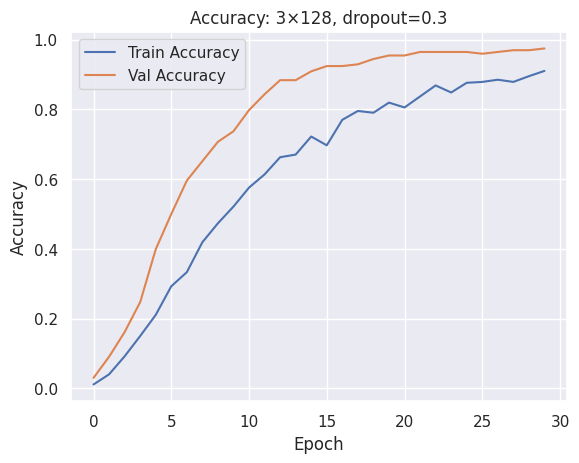

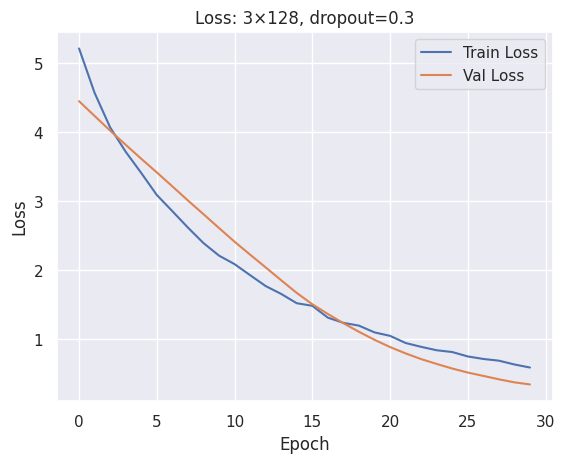


🔧 Training: 3 layers × 128 nodes/layer × dropout=0.5


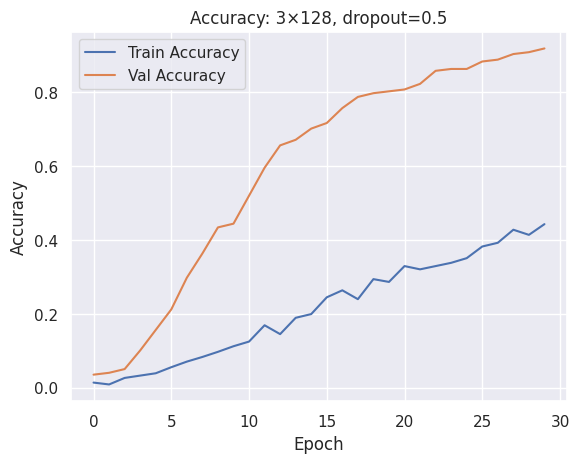

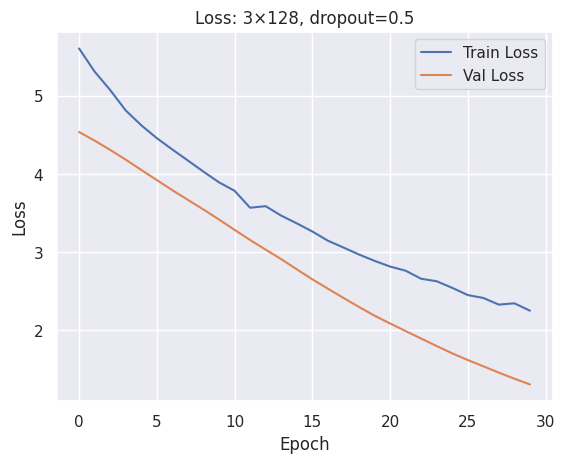


 Final Results:
    layers  nodes  dropout  train_accuracy  train_loss  val_accuracy  \
0        2     64      0.3          0.8270      1.2221        0.9141   
1        2     64      0.5          0.4356      2.4000        0.8333   
2        2    100      0.3          0.9621      0.4945        0.9747   
3        2    100      0.5          0.6629      1.4979        0.9293   
4        2    128      0.3          0.9722      0.3103        0.9646   
5        2    128      0.5          0.7904      1.0819        0.9545   
6        3     64      0.3          0.5770      1.9540        0.8384   
7        3     64      0.5          0.1515      3.5251        0.6313   
8        3    100      0.3          0.8270      0.9684        0.9394   
9        3    100      0.5          0.3245      2.6726        0.8687   
10       3    128      0.3          0.9104      0.5935        0.9747   
11       3    128      0.5          0.4432      2.2526        0.9192   

    val_loss  training_time_sec  
0     1.0759

In [ ]:
# Define hyperparameter grid
layers_list = [2, 3]
nodes_list = [64, 100, 128]
dropout_rates = [0.3, 0.5]

results = []
best_model = None
best_val_accuracy = 0

# Loop through all combinations
for layers in layers_list:
    for nodes in nodes_list:
        for dropout_rate in dropout_rates:
            print(f"\n🔧 Training: {layers} layers × {nodes} nodes/layer × dropout={dropout_rate}")

            # Build the model
            model = Sequential()
            model.add(Flatten(input_shape=(X_train.shape[1],)))

            for _ in range(layers):
                model.add(Dense(nodes, activation='relu'))
                model.add(BatchNormalization())
                model.add(Dropout(dropout_rate))

            model.add(Dense(y_train.shape[1], activation='softmax'))

            model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            start_time = time.time()
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=30,
                batch_size=128,
                verbose=0
            )
            end_time = time.time()
            training_time = round(end_time - start_time, 2)

            # Plot Accuracy
            plt.plot(history.history['accuracy'], label='Train Accuracy')
            plt.plot(history.history['val_accuracy'], label='Val Accuracy')
            plt.title(f'Accuracy: {layers}×{nodes}, dropout={dropout_rate}')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid(True)
            plt.show()

            # Plot Loss
            plt.plot(history.history['loss'], label='Train Loss')
            plt.plot(history.history['val_loss'], label='Val Loss')
            plt.title(f'Loss: {layers}×{nodes}, dropout={dropout_rate}')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

            # Evaluate
            val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
            train_accuracy = history.history['accuracy'][-1]
            train_loss = history.history['loss'][-1]

            results.append({
                'layers': layers,
                'nodes': nodes,
                'dropout': dropout_rate,
                'train_accuracy': round(train_accuracy, 4),
                'train_loss': round(train_loss, 4),
                'val_accuracy': round(val_accuracy, 4),
                'val_loss': round(val_loss, 4),
                'training_time_sec': training_time
            })

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_model = model

# Summarize all runs
df_results = pd.DataFrame(results)
print("\n Final Results:")
print(df_results)


#### Grid Search Takeaways

First attempt: layers = [2, 5], nodes = [10, 20] and epochs = 10
*   All models were underperforming with the best model on reaching ~13% validation accuracy.
*   Models were too simply for the task 20 nodes for distinguishing 99 classes
*   10 epochs is too few

Second attempt: layers = [2, 5], nodes = [50, 100] and epochs = 30
*   Models are significantly better, 2 layers and 100 nodes is the best model with training accuracy of 100% and validation accuracy of 96%.
*   Increasing from 2 layers to 5 layers does not improve validation accuracy and actually decreases it showing signs on overfitting.

Third attempt: layers = [2, 3], nodes = [64, 100, 128], dropout_rate = [0.3, 0.5], enable EarlyStopping and epochs = 30
*   Dropout sacrifices train_accuracy to improve val_accuracy by improving generalization
*   2-layer models consistently outperform 3-layer models
*   Best model here is 2-layers, 100-nodes, 0.3-dropout





In [ ]:
# Show the best-performing configuration
best_row = df_results[df_results['val_accuracy'] == df_results['val_accuracy'].max()]
print("Best Model Configuration Based on Validation Accuracy:")
print(best_row)

Best Model Configuration Based on Validation Accuracy:
    layers  nodes  dropout  train_accuracy  train_loss  val_accuracy  \
2        2    100      0.3          0.9621      0.4945        0.9747   
10       3    128      0.3          0.9104      0.5935        0.9747   

    val_loss  training_time_sec  
2     0.4513               6.95  
10    0.3482               7.72  


####  ROC and Precision-Recall graphs.

In [ ]:
# Predict probabilities on validation set
y_val_pred_proba = best_model.predict(X_val)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


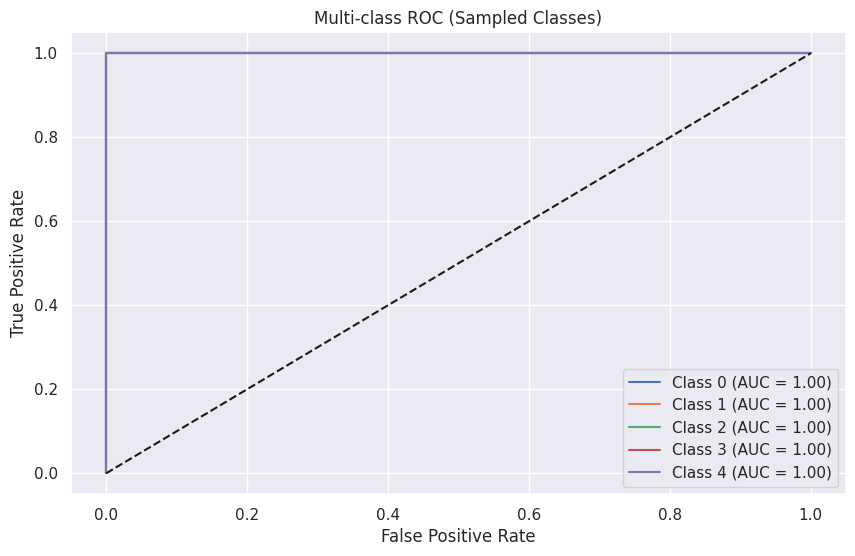

In [ ]:
# ROC and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_val.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_val_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot 5 example classes
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-class ROC (Sampled Classes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

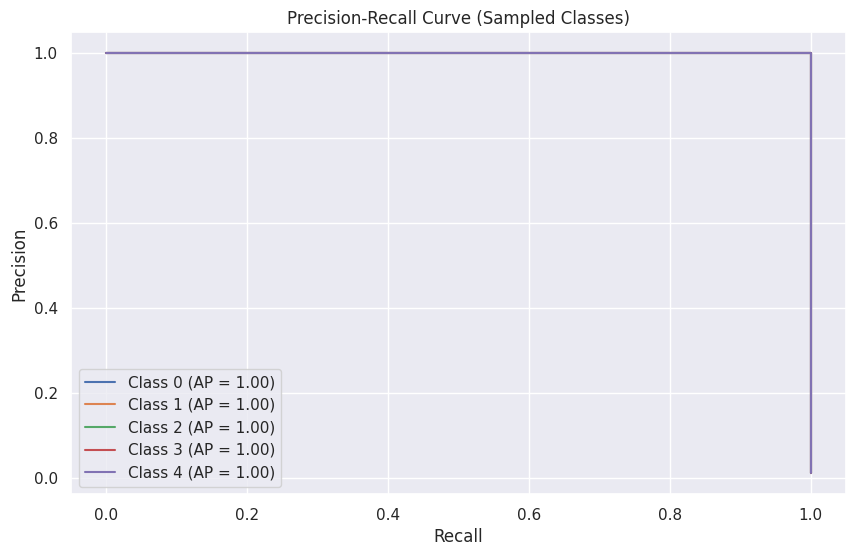

In [ ]:
# Precision-recall curves
precision = dict()
recall = dict()
avg_precision = dict()

for i in range(y_val.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_val[:, i], y_val_pred_proba[:, i])
    avg_precision[i] = average_precision_score(y_val[:, i], y_val_pred_proba[:, i])

# Plot 5 example classes
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {avg_precision[i]:.2f})')
plt.title('Precision-Recall Curve (Sampled Classes)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


#### Predictions using best model

In [ ]:
# Prepare test data
X_test = df_test[margin_vars + shape_vars + texture_vars].values
test_ids = df_test['id'].values

# Predict probabilities
y_test_pred_proba = best_model.predict(X_test)

# Create submission DataFrame
submission_df = pd.DataFrame(y_test_pred_proba, columns=leaf_classes)
submission_df.insert(0, 'id', test_ids)

# Save to CSV
submission_df.to_csv("leaf_submission.csv", index=False)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
